<h2><center> Code to match set of proteins from preppi database and save corresponding PPI network<br> <font color='blue'>Author: Kalyani Dhusia</font><br> <font color='blue'> Dated: 01.12.2020</font></center></h2>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from Bio import SeqIO
import csv
import re
import time
import math
import pytest
import glob

### Just to visualise the dimension of data

<font color="blue"> Searched uniprot with TERM "Plasma membrane","Single -pass Type I membrane protein" with SUBCELLULAR LOCATION to "membrane" and ORGANISM "_Homo speiens_". Once the following data is retrived 997 protein with their Uniprot stat were saved. </font>

In [2]:
filepath = "/Users/saheeba/Downloads/Uniprot997.csv"
uniprot997 = pd.read_csv(filepath)
print(uniprot997.shape)
uniprot997.head()

(997, 7)


,Entry,Entry name,Status,Protein names,Gene names,Organism,Length
0,O75581,LRP6_HUMAN,reviewed,Low-density lipoprotein receptor-related prote...,LRP6,Homo sapiens (Human),1613
1,P13688,CEAM1_HUMAN,reviewed,Carcinoembryonic antigen-related cell adhesion...,CEACAM1 BGP BGP1,Homo sapiens (Human),526
2,P19022,CADH2_HUMAN,reviewed,Cadherin-2 (CDw325) (Neural cadherin) (N-cadhe...,CDH2 CDHN NCAD,Homo sapiens (Human),906
3,P00533,EGFR_HUMAN,reviewed,Epidermal growth factor receptor (EC 2.7.10.1)...,EGFR ERBB ERBB1 HER1,Homo sapiens (Human),1210
4,P35613,BASI_HUMAN,reviewed,Basigin (5F7) (Collagenase stimulatory factor)...,BSG UNQ6505/PRO21383,Homo sapiens (Human),385


<font color="blue"> PrePPI: high confidence data >0.5 were saved for extracting network for extracellular region protein interctome  (https://honiglab.c2b2.columbia.edu/PrePPI/ref/preppi_final600.txt.tar.gz)</font>

<font color="blue"> PrePPI is database of predicted and experimentally determined protein-protein interactions (PPIs) for yeast and human. Predicted interactions are assigned a likelihood using a Bayesian framework that combines structural, functional, evolutionary and expression information. The database contains ~2 million predictions including 31,402 for yeast and 317,813 for human that are considered high confidence based on our analysis.</font>

In [3]:
filepath = "/Users/saheeba/Desktop/STR_string/preppi_final.csv"
preppi = pd.read_csv(filepath)
print(preppi.shape)
preppi.head(3)

(1048575, 12)


,prot1,prot2,str_score,protpep_score,str_max_score,red_score,ort_score,phy_score,coexp_score,go_score,total_score,final_score
0,Q13131,P14625,18.5900,6.44772,18.5900,4.2492,0.6153,2.4160,9.4687,10.80,12008.40,12008.40
1,P06400,Q96N96,1.8315,14.32220,14.3222,4.2492,0.0000,2.4160,2.1077,10.80,3346.93,3346.93
2,Q7Z6V5,Q8NCE0,4.5712,0.00000,4.5712,0.0000,0.0000,1.5978,9.4687,24.11,1667.40,1667.40


<font color="blue"> UniProt dataset retrieved needed to be pre-processed for filtering repeatation and to reduce redundancy. Thus Retrieve/ID mapping tab and set parameters from _UniProtKB AC/ID_ to _UniRef100_ . It reduces the number of entries from 997 to 975 </font>

In [4]:
path_to_file= "/Users/saheeba/Desktop/STR_string/sorted_978.csv"
sorted_list = pd.read_csv(path_to_file, index_col=False, header=0)
sorted_list.head()

,id,Cluster ID,Unnamed: 2,Cluster name,Size,Cluster members,Organisms,Length,Identity
0,O75581,UniRef100_O75581,partially reviewed and UniParc,Cluster: Low-density lipoprotein receptor-rela...,9,O75581; B3KQA9; F5H0Z3; A0A2J8SR31; A0A2J8QQF0...,Homo sapiens (Human); Pongo abelii (Sumatran o...,1613,100%
1,P13688,UniRef100_P13688,partially reviewed and UniParc,Cluster: Carcinoembryonic antigen-related cell...,5,P13688; M0R2K4; M0R109; UPI0006C9E68E; UPI0005...,Homo sapiens (Human),526,100%
2,P00533,UniRef100_P00533,partially reviewed and UniParc,Cluster: Epidermal growth factor receptor,11,P00533; H9F140; Q75MF2; F1JTL6; C9JYS6; UPI000...,Homo sapiens (Human); Macaca mulatta (Rhesus m...,1210,100%
3,P35613,UniRef100_P35613,partially reviewed,Cluster: Basigin,6,P35613; R4GMX5; P35613-3; A0A346RDT0; A0A346RC...,Homo sapiens (Human),385,100%
4,O00592,UniRef100_O00592,reviewed,Cluster: Podocalyxin,1,O00592,Homo sapiens (Human),558,100%


In [47]:
# define an empty list
places = []

# open file and read the content in a list
with open('975_protein.list', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        places.append(currentPlace)

<font color="blue"> Code to retrieve adjacent preppi network from the set of proteins extracted from Retrieve_ID/Mapping and save it as dataframe  </font>

In [48]:
items = sorted_list.iloc[:, 0].tolist()
print(type(items))#df = preppi.loc[preppi['prot1'].isin(sorted_list['id'])]
df = preppi.loc[preppi['prot1'].isin(places)]
print(df.shape)
df2 = df.loc[preppi['prot2'].isin(places)]
print(df2.shape)
export_csv = df2.to_csv (r'/Users/saheeba/Downloads/Preppi_interactome.csv', index = None, header=True)
df2.head()

<class 'list'>
(69880, 12)
(16447, 12)


,prot1,prot2,str_score,protpep_score,str_max_score,red_score,ort_score,phy_score,coexp_score,go_score,total_score,final_score
97,P05538,P19320,8.2077,3.67486,8.2077,20.9141,0.0000,2.0130,2.1077,0.89,648.191,648.191
126,Q96F46,Q8NFR9,5.3230,0.00000,5.3230,0.0000,9.2808,2.4160,1.5818,0.00,188.795,19358.300
170,Q29983,Q68D85,33.1143,0.00000,33.1143,5.2159,0.0000,1.5978,1.1757,0.00,324.462,310776.000
184,Q9Y5H8,Q9Y5E6,84.9724,0.00000,84.9724,1.3730,0.6153,2.4160,2.1077,10.80,3947.890,3947.890
235,P13688,P08514,11.9953,2.60197,11.9953,0.0000,0.0000,2.4160,1.1757,69.61,2371.790,2371.790


## <font color="blue"> Code to retrieve adjacent network cytoscape  </font>

 Prerequirements:
  
>Setup Cytoscape. 
Launch Cytoscape on your local machine. If you haven't already installed Cytoscape, then download the latest version from http://cytoscape.org.

>Install the STRING app, if you haven't already: http://apps.cytoscape.org/apps/stringapp

>Leave Cytoscape running in the background during the remainder of the tutorial.

>Check cytoscape connection.

In [73]:
conda install -c conda-forge py2cytoscape

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [74]:
from py2cytoscape.data.cynetwork import CyNetwork
from py2cytoscape.data.cyrest_client import CyRestClient
from py2cytoscape.data.style import StyleUtil
from py2cytoscape.data.style import StyleUtil as s_util
import py2cytoscape.util.cytoscapejs as cyjs
import py2cytoscape.cytoscapejs as renderer
import networkx as nx
import json

<IPython.core.display.Javascript object>

In [75]:
from py2cytoscape import cyrest
cytoscape=cyrest.cyclient()
cytoscape.version()

apiVersion v1
cytoscapeVersion 3.7.2


In [76]:
cytoscape.session.new()

In [77]:
cytoscape.vizmap.apply(styles="default")

{'views': []}

In [78]:
brc_expr=pd.read_csv("Preppi_interactome.csv")
#brc_mut=pd.read_table("data/brc.mut.tsv")
print(brc_expr.shape)
brc_expr.head()

(16709, 12)


,prot1,prot2,str_score,protpep_score,str_max_score,red_score,ort_score,phy_score,coexp_score,go_score,total_score,final_score
0,P05538,P19320,8.2077,3.67486,8.20770,20.9141,0.0000,2.0130,2.1077,0.89,648.191,648.191
1,Q96F46,Q8NFR9,5.3230,0.00000,5.32300,0.0000,9.2808,2.4160,1.5818,0.00,188.795,19358.300
2,P03372,Q9NR97,1.1641,7.41566,7.41566,21.3884,0.0000,2.4160,1.1757,2.07,932.592,932.592
3,Q29983,Q68D85,33.1143,0.00000,33.11430,5.2159,0.0000,1.5978,1.1757,0.00,324.462,310776.000
4,Q9Y5H8,Q9Y5E6,84.9724,0.00000,84.97240,1.3730,0.6153,2.4160,2.1077,10.80,3947.890,3947.890


In [79]:
# Create Client
cy = CyRestClient()
# Clear current session
cy.session.delete()


In [80]:
# Create a random graph
matrix_size = 10
weighted = np.empty((matrix_size,matrix_size,))
weighted[:] = np.NAN

row_idx = 0
for row in weighted:
    idx = row_idx
    while idx < matrix_size:
        if idx != row_idx and np.random.randint(2):
            weighted[row_idx][idx] = np.random.randn()
        idx +=1
    row_idx += 1

# for printing
df = pd.DataFrame(weighted)
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,NaN,-0.641814,NaN,0.761241,1.937362,NaN,NaN,-1.252297,NaN,-0.119808
1,NaN,NaN,1.615213,NaN,0.606452,NaN,NaN,NaN,NaN,-0.791507
2,NaN,NaN,NaN,-0.046521,0.262222,NaN,2.233423,-0.167549,NaN,0.952792
3,NaN,NaN,NaN,NaN,NaN,0.467128,NaN,-0.330331,-0.068005,NaN
4,NaN,NaN,NaN,NaN,NaN,-0.696701,NaN,0.108031,-0.463554,1.291357
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.298694
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535885,-0.775058
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.870437
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
weight_min = weighted.min() 
weight_max = weighted.max() 
 
net2 = cy.network.create_from_ndarray(weighted, name='weighted sample', weighted=True)
cy.layout.apply(network=net2, name="circular")
cy.layout.fit(network=net2)

# Styling
style_s2 = cy.style.create('Sample2')

defaults = {    
    'NODE_SIZE': 12,
    'NODE_BORDER_WIDTH': 2,
    'NODE_LABEL_FONT_SIZE': 14,
    'NODE_LABEL_COLOR': '#555555',
    'EDGE_TRANSPARENCY': 100,
    'EDGE_STROKE_UNSELECTED_PAINT': '#999999',
    'NETWORK_BACKGROUND_PAINT': '#FFFFFF'
}
style_s2.update_defaults(defaults)
score_to_width = s_util.create_slope(min=weight_min, max=weight_max, values=(1, 8))
style_s2.create_continuous_mapping(column='weight', vp='EDGE_WIDTH', col_type='Double', points=score_to_width)
cy.style.apply(style=style_s2, network=net2)

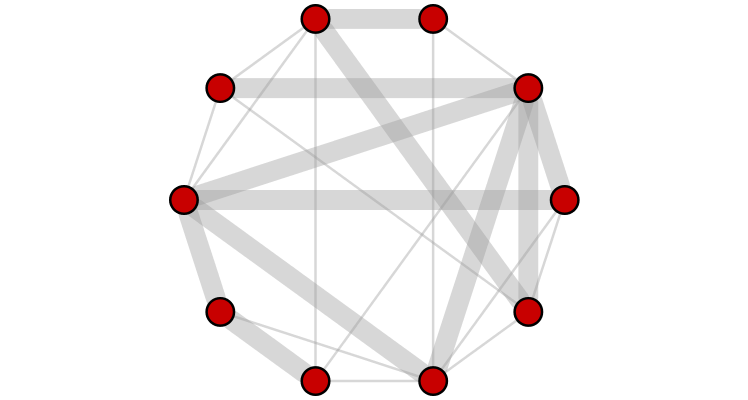

In [82]:
from IPython.display import Image
Image(net2.get_png(height=400))

## Retrieve domain sequences

#### _Method 1_

In [6]:
!egrep -w 'Extracellular|Transmembrane' 997_from\ uniprot.gff > word1_word2.csv
!egrep -w 'Extracellular' word1_word2.csv > word1.csv
!egrep -w 'Transmembrane' word1_word2.csv > word2.csv

In [7]:
spread = pd.read_csv('word1_word2.csv', sep='\t', header=None)
extracellular = pd.read_csv('word1.csv', sep='\t', header=None)
#print(spread.head())
#print(extracellular.head())

extra_id = extracellular.iloc[:, 0].tolist()
len(extra_id)
spread.head()#df = preppi.loc[preppi['prot1'].isin(sorted_list['id'])]
trans = spread[-spread.iloc[:,0].isin(extra_id)]
#df = preppi.loc[preppi['prot1'].isin(items)]
trans.head()

,0,1,2,3,4,5,6,7,8,9
57,P15382,UniProtKB,Transmembrane,44,66,.,.,.,Note=Helical;Ontology_term=ECO:0000255;evidenc...,NaN
75,Q5IJ48,UniProtKB,Transmembrane,1225,1245,.,.,.,Note=Helical;Ontology_term=ECO:0000255;evidenc...,NaN
120,P11279,UniProtKB,Transmembrane,383,405,.,.,.,Note=Helical;Ontology_term=ECO:0000255;evidenc...,NaN
123,Q9Y6J6,UniProtKB,Transmembrane,49,69,.,.,.,Note=Helical;Ontology_term=ECO:0000255;evidenc...,NaN
126,Q92673,UniProtKB,Transmembrane,2138,2158,.,.,.,Note=Helical;Ontology_term=ECO:0000255;evidenc...,NaN


In [8]:
word1 = extracellular.drop([extracellular.columns[1],extracellular.columns[5],extracellular.columns[6],extracellular.columns[7],extracellular.columns[8],extracellular.columns[9]],axis=1)
print("Size of extracellular keyword search :")
print(word1.head())
word2 = trans.drop([trans.columns[1],trans.columns[5],trans.columns[6],trans.columns[7],trans.columns[8],trans.columns[9]],axis=1)
print("Size of transmembrane without extracellular keyword search :")
print(word2.head())
trial = pd.DataFrame({'ID':word2.iloc[:,0], 'tab1':word2.iloc[:,1],'start':"1",'end':word2.iloc[:,3]-1})

trial.columns=word1.columns
position = pd.concat([word1,trial])
print(position.head())
print("\n")
col_Names=["proteinID","region","Start","End"]
data = pd.DataFrame(position.values,columns=col_Names)
print(data.head())

#to remove all duplicate entries(to remove, extracellular and transmembrane both word search id caught simultaneously)
data.drop_duplicates(subset ="proteinID",keep = False, inplace = True) 
export_csv = data.to_csv (r'/Users/saheeba/Downloads/data.csv', index = None, header=True)
data

#save tab spaced file to use in uniprot Retrieveid domain search
domain_position = pd.DataFrame({'ID':data.iloc[:,0], 'tab1':"[",'start':data.iloc[:,2],'space':"-",'end':data.iloc[:,3],'tab2':"]"})
domain_position.to_csv('domain_position.txt', index=False, sep=' ', header=None)
print(domain_position.shape)
domain_position.head()

Size of extracellular keyword search :
        0                   2    3     4
0  O75581  Topological domain   20  1370
1  P13688  Topological domain   35   428
2  P19022  Topological domain  160   724
3  P00533  Topological domain   25   645
4  P35613  Topological domain  138   323
Size of transmembrane without extracellular keyword search :
          0              2     3     4
57   P15382  Transmembrane    44    66
75   Q5IJ48  Transmembrane  1225  1245
120  P11279  Transmembrane   383   405
123  Q9Y6J6  Transmembrane    49    69
126  Q92673  Transmembrane  2138  2158
        0                   2    3     4
0  O75581  Topological domain   20  1370
1  P13688  Topological domain   35   428
2  P19022  Topological domain  160   724
3  P00533  Topological domain   25   645
4  P35613  Topological domain  138   323


  proteinID              region Start   End
0    O75581  Topological domain    20  1370
1    P13688  Topological domain    35   428
2    P19022  Topological domain   160   

,ID,tab1,start,space,end,tab2
0,O75581,[,20,-,1370,]
1,P13688,[,35,-,428,]
2,P19022,[,160,-,724,]
3,P00533,[,25,-,645,]
4,P35613,[,138,-,323,]


In [9]:
inputFile = open('domain_position.txt', 'r') 
exportFile = open('UniProt.txt', 'w')
for line in inputFile:
    new_line = line.replace(' ', '')
    exportFile.write(new_line) 

inputFile.close()
exportFile.close()

#### _Method 2_

In [10]:
found = []
#match = re.compile('(Transmembrane)'"\t"'(\w*)'"\t"'(\w*)')
match = re.compile('^(\S+).*?(Transmembrane)\t(\w*)\t(\w*)')
with open("997_from uniprot.gff", "r") as f:
    searchlines = f.readlines()
j=len(searchlines)-1 #with open('997_from uniprot.gff', "r") as raw:
for i, line in enumerate(searchlines):  #  for rec in raw:
    found.extend(match.findall(line))
    

#print(found)
#print(*found, sep="\n")
col_Names=["proteinID","location","Start","End"]
domain_position = pd.DataFrame(found,columns=col_Names)
print(domain_position.shape)
print(domain_position.head())
domain=domain_position.drop(['location'], axis=1)
print(domain.head())
table = pd.DataFrame({'ID':domain.iloc[:,0], 'tab1':"[",'start':domain.iloc[:,1],'space':"-",'end':domain.iloc[:,2],'tab2':"]"})

export_csv = table.to_csv (r'/Users/saheeba/Downloads/table.csv', index = None, header=True)
table.to_csv('table.txt', index=False, sep=' ', header=None)

with open('table.txt') as fin, open('newfile.txt', 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t',""))
#Save the table in csv in required format
inputFile = open('newfile.txt', 'r') 
exportFile = open('textfe.txt', 'w')
for line in inputFile:
    new_line = line.replace(' ', '')
    exportFile.write(new_line) 

inputFile.close()
exportFile.close()

table.head()

(989, 4)
  proteinID       location Start   End
0    O75581  Transmembrane  1371  1393
1    P13688  Transmembrane   429   452
2    P19022  Transmembrane   725   745
3    P00533  Transmembrane   646   668
4    P35613  Transmembrane   324   344
  proteinID Start   End
0    O75581  1371  1393
1    P13688   429   452
2    P19022   725   745
3    P00533   646   668
4    P35613   324   344


,ID,tab1,start,space,end,tab2
0,O75581,[,1371,-,1393,]
1,P13688,[,429,-,452,]
2,P19022,[,725,-,745,]
3,P00533,[,646,-,668,]
4,P35613,[,324,-,344,]


### <font color="black"> Once the list of proteins with positional sequences is save, use it to retieve sequences from MAppingID tab from Uniprot </font>

In [11]:
custom_seqs = pd.read_excel('customisedMappingID.xlsx')
print(custom_seqs['Gene names'])
custom_seqs.head()

0                      LRP6
1          CEACAM1 BGP BGP1
2            CDH2 CDHN NCAD
3      EGFR ERBB ERBB1 HER1
4      BSG UNQ6505/PRO21383
               ...         
970     LAMP3 DCLAMP TSC403
971                  KCNE1B
972             DNAJC1 HTJ1
973                   KCNE3
974                    CD1E
Name: Gene names, Length: 975, dtype: object


,yourlist:M202001296746803381A1F0E0DB47453E0216320D6E4B519,Entry,Entry name,Status,Protein names,Gene names,Organism,Length
0,O75581[20-1370],O75581,LRP6_HUMAN,reviewed,Low-density lipoprotein receptor-related prote...,LRP6,Homo sapiens (Human),1613
1,P13688[35-428],P13688,CEAM1_HUMAN,reviewed,Carcinoembryonic antigen-related cell adhesion...,CEACAM1 BGP BGP1,Homo sapiens (Human),526
2,P19022[160-724],P19022,CADH2_HUMAN,reviewed,Cadherin-2 (CDw325) (Neural cadherin) (N-cadhe...,CDH2 CDHN NCAD,Homo sapiens (Human),906
3,P00533[25-645],P00533,EGFR_HUMAN,reviewed,Epidermal growth factor receptor (EC 2.7.10.1)...,EGFR ERBB ERBB1 HER1,Homo sapiens (Human),1210
4,P35613[138-323],P35613,BASI_HUMAN,reviewed,Basigin (5F7) (Collagenase stimulatory factor)...,BSG UNQ6505/PRO21383,Homo sapiens (Human),385


In [12]:
sorted_custom_seq = custom_seqs.sort_values('Gene names',ascending=True)
sorted_custom_seq.rename(columns={'yourlist:M202001296746803381A1F0E0DB47453E0216320D6E4B519':'positionID'},inplace=True)
sorted_custom_seq.head() 

,positionID,Entry,Entry name,Status,Protein names,Gene names,Organism,Length
172,P12821[30-1256],P12821,ACE_HUMAN,reviewed,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,Homo sapiens (Human),1306
794,Q9BYF1[18-740],Q9BYF1,ACE2_HUMAN,reviewed,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,Homo sapiens (Human),805
273,Q04771[21-123],Q04771,ACVR1_HUMAN,reviewed,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,Homo sapiens (Human),509
931,D3DPA4[1-145],D3DPA4,D3DPA4_HUMAN,unreviewed,Serine/threonine-protein kinase receptor (EC 2...,ACVR1 hCG_1811747,Homo sapiens (Human),509
87,P36896[24-126],P36896,ACV1B_HUMAN,reviewed,Activin receptor type-1B (EC 2.7.11.30) (Activ...,ACVR1B ACVRLK4 ALK4,Homo sapiens (Human),505


#### <font color ="blue"> To get the expression data from Human Protein Atlas for our proteins of interest, we need list of all genes from above dataframe </font>

In [13]:
#split_data = custom_seqs['Gene names'].str.split(" ") #as the "Gene names" col has more than one entry, we need to split strings using space btw each gene name
split_data = sorted_custom_seq['Gene names'].str.split(" ") 
genes = split_data.to_list()
print(type(genes))
print(genes[16]) #It only splits into lists of list, each item in list still has multiple entry
listi = []
for i in range(len(genes)): #to overcome nested list, we loop through the lists and extract each item seperatly
       listi.append(pd.Series(genes[i]))
        #print(pd.Series(data[i]))
#listi.append(pd.Series(data[i]))
bingo = pd.DataFrame(listi) #save each item in one column of dataframe
bingo.to_csv('genesofinterest_human_atlas.csv', index=False)
print(bingo.head())
bingo.shape

<class 'list'>
['ADAM20']
        0               1     2    3    4    5    6    7
0     ACE             DCP  DCP1  NaN  NaN  NaN  NaN  NaN
1    ACE2  UNQ868/PRO1885   NaN  NaN  NaN  NaN  NaN  NaN
2   ACVR1         ACVRLK2   NaN  NaN  NaN  NaN  NaN  NaN
3   ACVR1     hCG_1811747   NaN  NaN  NaN  NaN  NaN  NaN
4  ACVR1B         ACVRLK4  ALK4  NaN  NaN  NaN  NaN  NaN


(975, 8)

In [14]:
bingo_new = pd.read_csv('genesofinterest_human_atlas.csv')
genes = bingo_new.iloc[:,0].tolist()
print(len(genes))
print("Done!")

975
Done!


## <font color="green"> Human Protein Atlas </font>
<font color="blue"> Read the data from the HPA project </font>

In [15]:
#import urllib2
import urllib.request
fhand = urllib.request.urlopen('https://www.proteinatlas.org/download/normal_tissue.tsv.zip')
#response = urllib2.urlopen('https://www.proteinatlas.org/download/normal_tissue.tsv.zip')
zipcontent= fhand.read()
print(type(fhand))
print(type(zipcontent))

<class 'http.client.HTTPResponse'>
<class 'bytes'>


In [16]:
import requests, zipfile, io
r = requests.get('https://www.proteinatlas.org/download/normal_tissue.tsv.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/Users/saheeba/Downloads/")

In [17]:
#filepath= "/Users/saheeba/Downloads/Human_atlas_subcellular_location.tsv"
HP_atlas = pd.read_csv(z.open('normal_tissue.tsv'), sep = "\t")
print(HP_atlas.shape)
HP_atlas.head()

(1056061, 6)


,Gene,Gene name,Tissue,Cell type,Level,Reliability
0,ENSG00000000003,TSPAN6,adipose tissue,adipocytes,Not detected,Approved
1,ENSG00000000003,TSPAN6,adrenal gland,glandular cells,Not detected,Approved
2,ENSG00000000003,TSPAN6,appendix,glandular cells,Medium,Approved
3,ENSG00000000003,TSPAN6,appendix,lymphoid tissue,Not detected,Approved
4,ENSG00000000003,TSPAN6,bone marrow,hematopoietic cells,Not detected,Approved


In [18]:
protein_atlas = HP_atlas.loc[HP_atlas['Gene name'].isin(genes)]
print(protein_atlas.shape)
export_csv = protein_atlas.to_csv (r'/Users/saheeba/Downloads/Corresponding_human_atlas.csv', index = None, header=True)
protein_atlas.head()

(48993, 6)


,Gene,Gene name,Tissue,Cell type,Level,Reliability
865,ENSG00000001561,ENPP4,adipose tissue,adipocytes,Low,Approved
866,ENSG00000001561,ENPP4,adrenal gland,glandular cells,High,Approved
867,ENSG00000001561,ENPP4,appendix,glandular cells,Medium,Approved
868,ENSG00000001561,ENPP4,appendix,lymphoid tissue,Low,Approved
869,ENSG00000001561,ENPP4,bone marrow,hematopoietic cells,Medium,Approved


In [19]:
#human_atlas[order(match(human_atlas[:,1],bingo[:,0])),]
#Only to sort the dataframe in alphabetical order of gene names
protein_atlas.loc[protein_atlas['Gene name'].isin(genes)]
sorted_atlas = protein_atlas.sort_values(by=['Gene name'], ascending=True)
print(sorted_atlas.shape)
sorted_atlas.head(3)

(48993, 6)


,Gene,Gene name,Tissue,Cell type,Level,Reliability
629557,ENSG00000159640,ACE,soft tissue 1,fibroblasts,Not detected,Enhanced
629514,ENSG00000159640,ACE,colon,glandular cells,Not detected,Enhanced
629515,ENSG00000159640,ACE,colon,peripheral nerve/ganglion,Not detected,Enhanced


In [20]:
df = sorted_atlas.groupby(['Gene name','Level'], as_index=False)['Cell type'].agg(', '.join).set_index(['Gene name','Level'])['Cell type'].unstack().reset_index()
df.to_csv(r'/Users/saheeba/Downloads/sorted_genes_human_atlas.csv', index = None, header=True)
print(df.shape) 
df.head(10)

(619, 5)


Level,Gene name,High,Low,Medium,Not detected
0,ACE,"glandular cells, glandular cells, glandular ce...",endothelial cells,"glandular cells, pneumocytes, cells in seminif...","fibroblasts, glandular cells, peripheral nerve..."
1,ACE2,"glandular cells, Leydig cells, cells in semini...","glandular cells, glandular cells, glandular ce...",NaN,"adipocytes, smooth muscle cells, epidermal cel..."
2,ACVR1,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."
3,ACVR1B,NaN,"glandular cells, decidual cells, squamous epit...","exocrine glandular cells, glandular cells, gla...","melanocytes, Langerhans, keratinocytes, fibrob..."
4,ACVR1C,"glandular cells, cells in tubules, glandular c...","glial cells, hematopoietic cells, adipocytes, ...","myoepithelial cells, cells in molecular layer,...",Langerhans
5,ACVR2A,"glandular cells, glandular cells, trophoblasti...","bile duct cells, glial cells, cells in granula...","keratinocytes, myocytes, glandular cells, glan...",NaN
6,ACVR2B,chondrocytes,"endothelial cells, glandular cells, peripheral...","glandular cells, respiratory epithelial cells,...","cells in endometrial stroma, cells in endometr..."
7,ACVRL1,"glandular cells, neuronal cells, cells in tubu...","glandular cells, glial cells, glandular cells,...","macrophages, cells in molecular layer, Purkinj...","squamous epithelial cells, peripheral nerve/ga..."
8,ADAM10,NaN,"glandular cells, decidual cells, squamous epit...","fibroblasts, glandular cells, glandular cells,...","myocytes, glandular cells, trophoblastic cells..."
9,ADAM11,NaN,"neuronal cells, glial cells, glial cells","cells in molecular layer, glial cells","melanocytes, decidual cells, glandular cells, ..."


 #### Conditional combine all dataframes

In [21]:
#print(genes)
sorted_custom_seq['Gene name'] = genes
sorted_custom_seq.head(3)

,positionID,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Gene name
172,P12821[30-1256],P12821,ACE_HUMAN,reviewed,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,Homo sapiens (Human),1306,ACE
794,Q9BYF1[18-740],Q9BYF1,ACE2_HUMAN,reviewed,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,Homo sapiens (Human),805,ACE2
273,Q04771[21-123],Q04771,ACVR1_HUMAN,reviewed,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,Homo sapiens (Human),509,ACVR1


In [22]:
s1 = pd.merge(sorted_custom_seq,df ,how='inner', on=['Gene name'])
export = s1.to_csv('merged_expression.csv',index = None, header=True)
print(s1.shape)
s1.head(3)

(645, 13)


,positionID,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Gene name,High,Low,Medium,Not detected
0,P12821[30-1256],P12821,ACE_HUMAN,reviewed,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,Homo sapiens (Human),1306,ACE,"glandular cells, glandular cells, glandular ce...",endothelial cells,"glandular cells, pneumocytes, cells in seminif...","fibroblasts, glandular cells, peripheral nerve..."
1,Q9BYF1[18-740],Q9BYF1,ACE2_HUMAN,reviewed,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,Homo sapiens (Human),805,ACE2,"glandular cells, Leydig cells, cells in semini...","glandular cells, glandular cells, glandular ce...",NaN,"adipocytes, smooth muscle cells, epidermal cel..."
2,Q04771[21-123],Q04771,ACVR1_HUMAN,reviewed,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,Homo sapiens (Human),509,ACVR1,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."


In [23]:
s2 = s1.drop(['Status','Organism','Gene name','Entry name'], axis = 1)
s2.rename(columns={'High':'Protein Expression : High','Low':'Protein Expression : Low','Medium':'Protein Expression : Medium'},inplace=True)
s2.head()

,positionID,Entry,Protein names,Gene names,Length,Protein Expression : High,Protein Expression : Low,Protein Expression : Medium,Not detected
0,P12821[30-1256],P12821,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,1306,"glandular cells, glandular cells, glandular ce...",endothelial cells,"glandular cells, pneumocytes, cells in seminif...","fibroblasts, glandular cells, peripheral nerve..."
1,Q9BYF1[18-740],Q9BYF1,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,805,"glandular cells, Leydig cells, cells in semini...","glandular cells, glandular cells, glandular ce...",NaN,"adipocytes, smooth muscle cells, epidermal cel..."
2,Q04771[21-123],Q04771,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,509,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."
3,D3DPA4[1-145],D3DPA4,Serine/threonine-protein kinase receptor (EC 2...,ACVR1 hCG_1811747,509,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."
4,P36896[24-126],P36896,Activin receptor type-1B (EC 2.7.11.30) (Activ...,ACVR1B ACVRLK4 ALK4,505,NaN,"glandular cells, decidual cells, squamous epit...","exocrine glandular cells, glandular cells, gla...","melanocytes, Langerhans, keratinocytes, fibrob..."


In [31]:
identifiers = []
sequences = []
lengths = []
for seq_record in SeqIO.parse('source_list_975.fasta', 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        sequences.append(repr(seq_record.seq))#sequences.append(seq_record.seq)#.upper()
        lengths.append(len(seq_record.seq))
        s11 = pd.Series(identifiers, name='ID')
        s12 = pd.Series(sequences, name='Seq')
        s13 = pd.Series(lengths, name='len')
        pdf = pd.DataFrame(dict(ID=s11, sequences=s12, Seq_length=s13))
pdf['Entry']= pdf['ID'].str.split('|').str[1]
pdf.head()

,ID,sequences,Seq_length,Entry
0,sp|Q9NR97|27-827,Seq('EENFSRSYPCDEKKQNDSVIAECSNRRLQEVPQTVGKYVTE...,801,Q9NR97
1,sp|Q02846|52-462,Seq('AVFTVGVLGPWACDPIFSRARPDLAARLAAARLNRDPGLAG...,411,Q02846
2,sp|Q9NY15|26-2478,Seq('QVLFKGCDVKTTFVTHVPCTSCAAIKKQTCPSGWLRELPDQ...,2453,Q9NY15
3,sp|A6NFA1|20-494,Seq('RPQPPDGGQCRPPGSQRDLNSFLWTIRRDPPAYLFGTIHVP...,475,A6NFA1
4,sp|Q86V40|20-477,Seq('ASRRGAPGTANCELKPQQSELNSFLWTIKRDPPSYFFGTIH...,458,Q86V40


In [32]:
s3 = pd.merge(s1,pdf ,how='inner', on=['Entry'])
s3.head(3)

,positionID,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Gene name,High,Low,Medium,Not detected,ID,sequences,Seq_length
0,P12821[30-1256],P12821,ACE_HUMAN,reviewed,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,Homo sapiens (Human),1306,ACE,"glandular cells, glandular cells, glandular ce...",endothelial cells,"glandular cells, pneumocytes, cells in seminif...","fibroblasts, glandular cells, peripheral nerve...",sp|P12821|30-1256,Seq('LDPGLQPGNFSADEAGAQLFAQSYNSSAEQVLFQSVAASWA...,1227
1,Q9BYF1[18-740],Q9BYF1,ACE2_HUMAN,reviewed,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,Homo sapiens (Human),805,ACE2,"glandular cells, Leydig cells, cells in semini...","glandular cells, glandular cells, glandular ce...",NaN,"adipocytes, smooth muscle cells, epidermal cel...",sp|Q9BYF1|18-740,Seq('QSTIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEEN...,723
2,Q04771[21-123],Q04771,ACVR1_HUMAN,reviewed,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,Homo sapiens (Human),509,ACVR1,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ...",sp|Q04771|21-123,Seq('MEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSIND...,103


In [38]:
s4 = s3.drop(['Status','Organism','Gene name','Length','ID'], axis = 1)
s4.rename(columns={'High':'Protein Expression : High','Low':'Protein Expression : Low','Medium':'Protein Expression : Medium'},inplace=True)
s4 = s4[['Entry','positionID','sequences','Protein names','Gene names','Seq_length','Protein Expression : High','Protein Expression : Low','Protein Expression : Medium','Not detected']]
s4.head()

,Entry,positionID,sequences,Protein names,Gene names,Seq_length,Protein Expression : High,Protein Expression : Low,Protein Expression : Medium,Not detected
0,P12821,P12821[30-1256],Seq('LDPGLQPGNFSADEAGAQLFAQSYNSSAEQVLFQSVAASWA...,Angiotensin-converting enzyme (ACE) (EC 3.2.1....,ACE DCP DCP1,1227,"glandular cells, glandular cells, glandular ce...",endothelial cells,"glandular cells, pneumocytes, cells in seminif...","fibroblasts, glandular cells, peripheral nerve..."
1,Q9BYF1,Q9BYF1[18-740],Seq('QSTIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEEN...,Angiotensin-converting enzyme 2 (EC 3.4.17.23)...,ACE2 UNQ868/PRO1885,723,"glandular cells, Leydig cells, cells in semini...","glandular cells, glandular cells, glandular ce...",NaN,"adipocytes, smooth muscle cells, epidermal cel..."
2,Q04771,Q04771[21-123],Seq('MEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSIND...,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,103,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."
3,D3DPA4,D3DPA4[1-145],Seq('MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLS...,Serine/threonine-protein kinase receptor (EC 2...,ACVR1 hCG_1811747,145,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ..."
4,P36896,P36896[24-126],Seq('SGPRGVQALLCACTSCLQANYTCETDGACMVSIFNLDGMEH...,Activin receptor type-1B (EC 2.7.11.30) (Activ...,ACVR1B ACVRLK4 ALK4,103,NaN,"glandular cells, decidual cells, squamous epit...","exocrine glandular cells, glandular cells, gla...","melanocytes, Langerhans, keratinocytes, fibrob..."


In [39]:
export = s4.to_csv('merged_uniprot_expression.csv',index = None, header=True)

In [41]:
pdf['checker']= pdf['ID'].str.split('|').str[1]
pdf.head()

,ID,sequences,Seq_length,Entry,checker
0,sp|Q9NR97|27-827,Seq('EENFSRSYPCDEKKQNDSVIAECSNRRLQEVPQTVGKYVTE...,801,Q9NR97,Q9NR97
1,sp|Q02846|52-462,Seq('AVFTVGVLGPWACDPIFSRARPDLAARLAAARLNRDPGLAG...,411,Q02846,Q02846
2,sp|Q9NY15|26-2478,Seq('QVLFKGCDVKTTFVTHVPCTSCAAIKKQTCPSGWLRELPDQ...,2453,Q9NY15,Q9NY15
3,sp|A6NFA1|20-494,Seq('RPQPPDGGQCRPPGSQRDLNSFLWTIRRDPPAYLFGTIHVP...,475,A6NFA1,A6NFA1
4,sp|Q86V40|20-477,Seq('ASRRGAPGTANCELKPQQSELNSFLWTIKRDPPSYFFGTIH...,458,Q86V40,Q86V40


In [42]:
f_open = open('/Users/saheeba/Downloads/splits_files/source_list_975.fasta', 'r')

for rec in SeqIO.parse(f_open, "fasta"):
    id = rec.id
    seq = rec.seq
    id_file = open(id.split('|')[1]+".fasta", "w")
    id_file.write(">"+str(id)+"\n"+str(seq))
    id_file.close()

f_open.close()

In [43]:
SignaLink = pd.read_csv('signal_Book.csv')
SignaLink.rename(columns={'source_uniprotAC':'Entry','target_uniprotAC':'Target'},inplace=True)
print(SignaLink.shape)
SignaLink.head(3)

(87581, 20)


,source_name,Entry,source_speciesID,source_species,source_topology,source_pathways,target_name,Target,target_speciesID,target_species,target_topology,target_pathways,layer,interaction_type,directness,effect,references,source,confidence_score,score_from_the_source
0,NFKB1,P19838,ENSG00000109320,H. sapiens,Transcription factor,NaN,PRKCE,Q02156,ENSG00000171132,H. sapiens,Scaffold,NaN,Transcriptional regulation,Transcriptional directed,indirect,unknown,14681366,"JASPAR(url: http://jaspar.cgb.ki.se/ ,pmid: 14...",GO Semantic Similarity: 0.563594,"Jaspar: 10.1804, Jaspar: 10.1804, Jaspar: 10.3..."
1,NFKB1,P19838,ENSG00000109320,H. sapiens,Transcription factor,NaN,PAG1,Q9NWQ8,ENSG00000076641,H. sapiens,"Co-factor,Scaffold",RTK(non-core),Transcriptional regulation,Transcriptional directed,indirect,unknown,14681366,"JASPAR(url: http://jaspar.cgb.ki.se/ ,pmid: 14...",GO Semantic Similarity: 0.521359,"Jaspar: 10.1804, Jaspar: 10.1804"
2,NFKB1,P19838,ENSG00000109320,H. sapiens,Transcription factor,NaN,MSTP055,Q58WW2,ENSG00000143164,H. sapiens,NaN,NaN,Transcriptional regulation,Transcriptional directed,indirect,unknown,14681366,"JASPAR(url: http://jaspar.cgb.ki.se/ ,pmid: 14...",GO Semantic Similarity: 0.294021,"Jaspar: 10.1804, Jaspar: 10.1804"


In [44]:
SignaLink_2_0 = SignaLink.groupby(['Entry','target_pathways'], as_index=False)['Target'].agg(', '.join).set_index(['Entry','target_pathways'])['Target'].unstack().reset_index()
SignaLink_2_0.head()

target_pathways,Entry,Hedgehog(core),"Hedgehog(core),WNT/Wingless(core)",Hedgehog(non-core),"Hedgehog(non-core),WNT/Wingless(non-core)",JAK/STAT(core),JAK/STAT(non-core),"JAK/STAT(non-core),TGF(non-core)",NHR(core),"NHR(core),TGF(non-core)",...,"RTK(non-core),TGF(core)","RTK(non-core),TGF(non-core)","RTK(non-core),TGF(non-core),TGF(core),WNT/Wingless(core)","RTK(non-core),WNT/Wingless(non-core)",TGF(core),TGF(non-core),"TGF(non-core),WNT/Wingless(core)","TGF(non-core),WNT/Wingless(non-core)",WNT/Wingless(core),WNT/Wingless(non-core)
0,A0AUL6,NaN,NaN,Q13616,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O75581,P68400
1,A0AV37,"P08151, O43323, Q15465",NaN,"O00422, Q13627, Q13616, Q9BWV1",Q9Y297,"P26992, P07333, P19235, P01241, P10912, P48551...","O14522, O43187, P29350, P08575",NaN,"Q92731, P62508, O00482, P22736, P08235, P43354...","P03372, P04150",...,NaN,P06730,O15169,NaN,"P08476, P12643, O00238, Q13873, P10600, P43026...","Q9H0M0, Q96PU5, Q92830, P61586, P62136, P36873...",P35222,Q9HAU4,"Q92837, O14641, O75581","P68400, O94907, Q99697, P67775, Q13464, Q04724..."
2,A0AV47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0AV58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,O14980,NaN,NaN,NaN,NaN
4,A0AVI9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,O14980,NaN,NaN,NaN,NaN


In [46]:
signal_pathway=pd.merge(s4,SignaLink_2_0 ,how='inner', on=['Entry'])
signal_pathway.head(3)

,Entry,positionID,sequences,Protein names,Gene names,Seq_length,Protein Expression : High,Protein Expression : Low,Protein Expression : Medium,Not detected,...,"RTK(non-core),TGF(core)","RTK(non-core),TGF(non-core)","RTK(non-core),TGF(non-core),TGF(core),WNT/Wingless(core)","RTK(non-core),WNT/Wingless(non-core)",TGF(core),TGF(non-core),"TGF(non-core),WNT/Wingless(core)","TGF(non-core),WNT/Wingless(non-core)",WNT/Wingless(core),WNT/Wingless(non-core)
0,Q04771,Q04771[21-123],Seq('MEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSIND...,Activin receptor type-1 (EC 2.7.11.30) (Activi...,ACVR1 ACVRLK2,103,"glandular cells, smooth muscle cells","squamous epithelial cells, glial cells, pneumo...","myocytes, glandular cells, glandular cells, gl...","cells in endometrial stroma, glandular cells, ...",...,NaN,NaN,NaN,NaN,"Q15797, Q99717",NaN,NaN,NaN,NaN,NaN
1,P36896,P36896[24-126],Seq('SGPRGVQALLCACTSCLQANYTCETDGACMVSIFNLDGMEH...,Activin receptor type-1B (EC 2.7.11.30) (Activ...,ACVR1B ACVRLK4 ALK4,103,NaN,"glandular cells, decidual cells, squamous epit...","exocrine glandular cells, glandular cells, gla...","melanocytes, Langerhans, keratinocytes, fibrob...",...,NaN,NaN,NaN,NaN,Q04771,NaN,NaN,NaN,NaN,NaN
2,Q13705,Q13705[19-137],Seq('SGRGEAETRECIYYNANWELERTNQSGLERCEGEQDKRLHC...,Activin receptor type-2B (EC 2.7.11.30) (Activ...,ACVR2B,119,chondrocytes,"endothelial cells, glandular cells, peripheral...","glandular cells, respiratory epithelial cells,...","cells in endometrial stroma, cells in endometr...",...,NaN,NaN,NaN,NaN,"P36894, P36896, Q04771, O00238, P37023",NaN,NaN,NaN,NaN,NaN
